# lo que aprenderas
- aprenderamos a crear una CNN + DNN con modelos de TF, para resolver la clasificacion de fashioMNIST
- que varia si usamos una CNN+DNN vs DNN. this time with Convolutional layers added first. with CNN it will take longer, but look at the impact on the accuracy:
  - DNN: Your accuracy is probably about 89% on training and 87% on validation. 
  - CNN+ DNN: your accuaracy it's likely gone up to about 93% on the training data and 91% on the validation data.
- que es una CNN: el concepto final es que reducen el contenido de la imagen para centrarse en detalles específicos y distintos. because you'll just train on the highlighted features. 
- Veras que tienes que conectar una CNN +DNN, Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focussed, and possibly more accurate
- entenderas de nuevo que el overfitting aparece cuando aumentas las epocas y el sistema aumenta su accuracy con el DS de entrenamiento, pero disminuye , cuando usamos el DS de evaluacion.


- manipular un modelo para dar manulamente el input en cualquier capa y pedir el output de cualquier capa.
- forma resumida de usar for 
```
from tensorflow.keras import models
# ver notebook 4 de como usar la forma comprimida de for 
# de cada capa solicitamos su objeto output y lo guardamos en una lista 
layer_outputs = [layer.output for layer in model.layers]
# crearemos un nuevo modelo el cual para un input generara una lista con outputs de cada capa  
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[indice_de_la_capa_del output] # shape = (None, 26, 26, 64): una imagen con 64 filtros 
  print(f1.shape)
  # f1 contendra el output de  la capa con indice x para el input test_images[FIRST_IMAGE]
plt.imshow(f1[0, : , :, indice_de_mapa_de_caracteristicas], cmap='inferno')
```

- el input de nuestra primera capa de nuestra CNN  sera de: (batch_s, altura_img, anchura_img, pixel_o_RGV_canales)
en nuestro ejemplo tenemos que hacer un reshape (60000, 28, 28) -> (60000, 28, 28, 1)    
training_images=training_images.reshape(60000, 28, 28, 1) 
- asi se define las convoluciones 
```
model = tf.keras.models.Sequential([
  # 64 = convoluciones o mapas de carac ;(3,3) = tamaño de filtro
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  # (2,2) para hacer MaxPooling y reducir a la cuarta parte el tamaño de la imagen
  tf.keras.layers.MaxPooling2D(2, 2),
```

- imprimir varias graficas sobre un grid definido: 
```
# especifica el grid para las subplots de 3 filas y 4 columnas
f, axarr = plt.subplots(3,4)
# especificamos que la primera grafica se coloque en la posicion [0,0] del grid 
([1,0,0],
 [0,0,0],
 [0,0,0])
axarr[0,0].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
```




nombre original del colab:    
Lab4-Using-Convolutions.ipynb
# Improving Computer Vision Accuracy using Convolutions (DNN vs CNN)

In the previous lessons you saw how to do fashion recognition using a Deep Neural Network (DNN) containing three layers -- the input layer (in the shape of the data), the output layer (in the shape of the desired output) and a hidden layer. You experimented with the impact of different sized of hidden layer, number of training epochs etc on the final accuracy.

For convenience, here's the entire code again. Run it and take a note of the test accuracy that is printed out at the end. 

In [ ]:

# cargamos el modelo del capitulo 3 para compara con el nuevo modelo DNN vs CNN
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)
model.summary()

4431872/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4969 - accuracy: 0.8258
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3749 - accuracy: 0.8652
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3400 - accuracy: 0.8752
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3118 - accuracy: 0.8854
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3395 - accuracy: 0.8782
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)  

In [ ]:
print(training_labels.shape)
print(training_labels[0])

(60000,)
9


**Para entender mejor lo que hace una CNN ve mejor el video de DOT CSV.**   
Your accuracy is probably about 89% on training and 87% on validation...not bad...But how do you make that even better? One way is to use something called Convolutions. I'm not going to details on Convolutions here, but the ultimate concept is that they narrow down the content of the image to focus on specific, distinct, details (pero el concepto final es que reducen el contenido de la imagen para centrarse en detalles específicos y distintos.). 

If you've ever done image processing using a filter (like this: https://en.wikipedia.org/wiki/Kernel_(image_processing)) then convolutions will look very familiar.

In short, you take an array (usually 3x3 or 5x5) and pass it over the image. By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection. So, for example, if you look at the above link, you'll see a 3x3 that is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has the edges enhanced.

This is perfect for computer vision, because often it's features that can get highlighted like this that distinguish one item for another, and the amount of information needed is then much less... **because you'll just train on the highlighted features**

**That's the concept of Convolutional Neural Networks. Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focussed, and possibly more accurate**

**Run the below code -- this is the same neural network as earlier, but this time with Convolutional layers added first. It will take longer, but look at the impact on the accuracy:**

In [ ]:
import tensorflow as tf
print(tf.__version__)
# 1, 2 cargamos y preparamos los datos(ajuste al modelo y normalizar)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# este paso crea guarda cada pixel dentro de una caja, ya que asi lo pide 
# el modelo para opciones RGV pasamos de (60000, 28, 28) -> (60000, 28, 28, 1)
#print(training_images.shape)
training_images=training_images.reshape(60000, 28, 28, 1) 
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

# 3 creamos el modelo
model = tf.keras.models.Sequential([
  # 64 = convoluciones o mapas de carac ;(3,3) = tamaño de filtro
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  # (2,2) para hacer MaxPooling y reducir a la cuarta parte el tamaño de la imagen
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
# 4, 5, 6 compilar, entrenar, y evaluar
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


2.7.0
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)        

# la importancia entre la presicion de entrenamiento y la de validacion es el overfitting 
**your accuaracy it's likely gone up to about 93% on the training data and 91% on the validation data.**

That's significant, and a step in the right direction!
## if you only increase the epochs you could have overfitting
 
**Try running it for more epochs -- say about 20, and explore the results! But while the results might seem really good, the validation results may actually go down, due to something called 'overfitting' which will be discussed later.** 

(In a nutshell, 'overfitting' occurs when the network learns the data from the training set really well, but it's too specialised to only that data, and as a result is less effective at seeing *other* data. For example, if all your life you only saw red shoes, then when you see a red shoe you would be very good at identifying it, but blue suade shoes might confuse you...and you know you should never mess with my blue suede shoes.)



#look at the code and see, step by step how the Convolutions were built:

# 1 gather the data 
### ! la principal diferencia entre crear un modelo DNN vs CNN para clasificacion es hacer un reshape a la data 
in this case data needed to be reshape
Step 1 is to gather the data. You'll notice that there's a bit of a change here in that the training data needed to be **reshaped. That's because the first convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1**, and the same for the test images. If you don't do this, you'll get an error when training as the Convolutions do not recognize the shape. 



```
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
```



# 2 define your model. 
## 2.1 defininig a convolution layer 
**Now instead of the input layer at the top, you're going to add a Convolution. The parameters are**:

1. The number of convolutions **(32 = numero de mapas de caracteristicas o convoluciones)** you want to generate. Purely arbitrary, but good to start with something in the order of 32
2. The size of the Convolution, in this case a **3x3 (tamaño del filtro)** grid
3. The a**ctivation function** to use -- in this case we'll use** relu**, which you might recall is the equivalent of returning x when x>0, else returning 0
4. In the first layer, the shape of the **input data**.
## 2.2 Pooling layer 
You'll follow the Convolution with a **MaxPooling layer which is then designed to compress the image**, while maintaining the content of the features that were highlighted by the convlution. 
**By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image**. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one, thus turning 4 pixels into 1. It repeats this across the image, and in so doing halves the number of horizontal, and halves the number of vertical pixels, **effectively reducing the image by 25%.**

You can call model.summary() to see the size and shape of the network, and you'll notice that after every MaxPooling layer, the image size is reduced in this way. 


```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```



Add another convolution



```
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
```



# 3 join the CNN with DNN
Now flatten the output. After this you'll just have the same DNN structure as the non convolutional version

```
  tf.keras.layers.Flatten(),
```



The same 128 dense layers, and 10 output layers as in the pre-convolution example:



```
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```



Now compile the model, call the fit method to do the training, and **evaluate the loss and accuracy from the test set.**



```
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)
```




# Visualizing the Convolutions and Pooling

This code will show us the convolutions graphically. The print (test_labels[;100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


So, in the following code, FIRST_IMAGE, SECOND_IMAGE and THIRD_IMAGE are all the indexes for value 9, an ankle boot.

# vizualizando los resultados de una convolucion y una pooling 
para logralo realizaremos los siguientes pasos.
## manipular un modelo para dar  manulamente el input en cualquier capa  y pedir el output de cualquier capa. 
1. crear un nuevo modelo,basado en el que ya entrenamos, que en vez de solo generar un input en la ultima capa, este nuevo generara un output en cada capa.

## importante sintaxis para manejar los datos de un array imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')

(1, 26, 26, 64)
(1, 13, 13, 64)
(1, 11, 11, 64)
(1, 5, 5, 64)


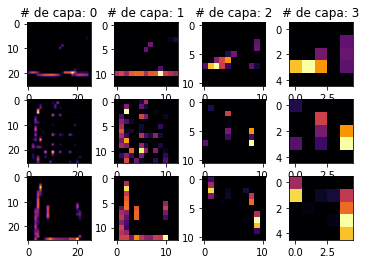

In [ ]:
import matplotlib.pyplot as plt
# especifica que crearemos un mallado para las subplots de 3 filas y 4 columnas
f, axarr = plt.subplots(3,4)
# indices de imagenes de botas
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26

# indica el filtro que que queramos vixualizar, recuerda que el valor 0 corresponde al pixel original 
CONVOLUTION_NUMBER = 20
from tensorflow.keras import models
# ver notebook 4 de como usar la forma comprimida de for 
# de cada capa solicitamos su objeto output y lo guardamos en una lista 
layer_outputs = [layer.output for layer in model.layers]
"""
https://keras.io/api/models/model/
aqui crearemos un nuevo modelo en el cual en vez de que para un input solo genere 
un solo ouput de la ultima capa, el nuevo modelo "activation_model" para un input
generara varios outputs especificamente generara un output de capa que especificamos en la lista anterior 
"""
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
# el numero 4 especifica que solo queremos imprimir el output de las primeras 4 capas 
# (conv64-3X3,Mpool2x2,conv64-3X3,Mpool2x2 )
# ejemplo la primera capa se encuntra en model[0] y su output en activation_model.predict()[0]
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  print(f1.shape)
  # f1 contendra el output de  la capa con indice x para el input test_images[FIRST_IMAGE]
  # viendo el model.summary vemos que la shape del output de la capa[0] = (None, 26, 26, 64): una imagen con 64 filtros 
  # para plotear especificamos de la imagen f1 de la 1raD saquemos lo del indice 0,
  # de la 2da y 3ra dimension sacamos todos los datos, y de la ultima dimension sacamos 
  # el pixel [1] correspondiente a pixel del filtro 1, el valor [0] es el pixel original 
  # axarr[fila del mallado, columna del mallado] cada iteracion imprimira un columna 
  # https://aprendeconalf.es/docencia/python/manual/matplotlib/
  # 
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  axarr[0,x].set_title(f'# de capa: {x}')
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

EXERCISES

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it. 

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)
"""conclucion podemos ver como reducriendo el numero de convolucion y el numero 
 y quitando 2 capas el rendimiento de la red mejora considerablemente
 pasando de un accuracy de 0.91 > 0.98. probablemente es por que se reduce 
 mucho la informacion como vemos en las graficas de arriba 

 """

2.7.0
11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1484 - accuracy: 0.9549
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0512 - accuracy: 0.9842
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0331 - accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0199 - accuracy: 0.9938
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0140 - accuracy: 0.9955
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0093 - accuracy: 0.9971
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0075 - accuracy: 0.9976
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0062 - accuracy: 0.9979
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0041 - accuracy: 0.9985
Epoch 10/10